# Streaming Content Analysis
This Jupyter Notebook analyzes a streaming content dataset to identify trends in genres, platforms, and original content success. We use bar graphs to visualize genre and platform distributions and a word cloud to explore popular tags. The dataset includes content ID, title, type, genre, platform, release year, duration, ratings, reviews, language, country, watched percentage, originality, actors, tags, and descriptions.


### Step 1: Import libraries

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import uuid

### Step 2: Load and clean the data

In [44]:
df = pd.read_csv("streaming_content_dataset.csv")
df.head()


,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
0,MV00001,Off middle,movie,Documentary,Disney+,2018.0,9999,3.9,20288,English,USA,92.69,no,"Brandon Mendoza, Victoria Andrews","Fantasy, Feel-Good, Feel-Good, Mystery",NaN
1,MV00002,Ground,series,Action,Netflix,1986.0,9999,1.1,37610,Hindi,UK,12.76,no,NaN,"Sci-Fi, Mystery, Supernatural",Project role goal anyone along avoid hit human...
2,MV00003,Article radio,series,Documentary,Disney+,2004.0,42,NaN,30347,Korean,India,NaN,No,"Rachel Simpson, Joshua Palmer","Comedy, Fantasy, Supernatural",NaN
3,MV00004,Responsibility hit difficult vote,movie,Sci-Fi,HBO,NaN,128,NaN,16473,English,UK,85.04,NaN,"Todd Santana, Tina Gonzalez","Drama, Drama, Supernatural",Establish can budget drop matter individual ac...
4,MV00005,Debate,Series,Fantasy,Netflix,NaN,61,5.9,15015,Japanese,France,84.91,no,"Connor Duke, Billy Love","Drama, Drama",Official where rate surface consider face desi...


In [45]:
df.tail()

,Content_ID,Title,Type,Genre,Platform,Release_Year,Duration_Minutes,Viewer_Rating,Number_of_Reviews,Language,Country,Watched_Percentage,Is_Original,Main_Actors,Tags,Description
9995,MV09996,Sister,series,Comedy,Disney+,NaN,172,6.2,9928,Hindi,UK,NaN,no,NaN,"Feel-Good, Romance",Message couple single data claim often herself...
9996,MV09997,Wonder,Mini-Series,Action,PRIME,NaN,0,1.6,27895,English,Japan,NaN,Yes,"Andrea Robinson, Jennifer Miller","Thriller, Horror",Job hit general office four my body should con...
9997,MV09998,Call some,movie,Horror,HBO,1996.0,0,1.8,459,Spanish,Canada,93.48,NaN,"Mark Green, Barbara Solomon","Fantasy, Sci-Fi",Accept several interview interview however pri...
9998,MV09999,She control employee country,Series,Fantasy,Disney+,NaN,0,11.0,20404,Spanish,South Korea,NaN,no,"Courtney Fleming, Michael Webb","Drama, Comedy",Official hair receive kind act eat mouth blood...
9999,MV10000,Artist general fire,Mini-Series,Romance,Prime,2012.0,0,1.1,40348,Hindi,India,58.33,NaN,"Melissa Rose, James Cross","Documentary, Comedy, Sci-Fi, Drama",Movie well ever food necessary seek example vi...


In [46]:
# Checking the number of rows and columns
df.shape

(10000, 16)

In [48]:
# Checking for missing values
df.isnull().sum()

Content_ID               0
Title                    7
Type                     0
Genre                    0
Platform                 0
Release_Year          5059
Duration_Minutes         0
Viewer_Rating         3350
Number_of_Reviews        0
Language                 0
Country                  0
Watched_Percentage    5099
Is_Original           2001
Main_Actors           2012
Tags                     0
Description           2006
dtype: int64

In [49]:
df.dtypes

Content_ID             object
Title                  object
Type                   object
Genre                  object
Platform               object
Release_Year          float64
Duration_Minutes        int64
Viewer_Rating         float64
Number_of_Reviews       int64
Language               object
Country                object
Watched_Percentage    float64
Is_Original            object
Main_Actors            object
Tags                   object
Description            object
dtype: object

In [50]:
# Replace empty strings and invalid values with NaN
df.replace('', np.nan, inplace=True)

df['Viewer_Rating'] = pd.to_numeric(df['Viewer_Rating'], errors='coerce')

df['Watched_Percentage'] = pd.to_numeric(df['Watched_Percentage'], errors='coerce')

df['Duration_Minutes'] = pd.to_numeric(df['Duration_Minutes'], errors='coerce')

In [52]:
# Handle outliers in Duration_Minutes (e.g., 9999 minutes is unrealistic)
df['Duration_Minutes'] = df['Duration_Minutes'].apply(lambda x: np.nan if x > 1000 else x)

In [53]:
# Convert Is_Original to boolean
df['Is_Original'] = df['Is_Original'].str.lower().map({'yes': True, 'no': False, np.nan: False})

In [54]:
# Convert Release_Year to Int64
#Round to nearest integer to handle any non-integer floats, preserve NaN
df['Release_Year'] = df['Release_Year'].round().astype('Int64')

In [55]:
# Checking if the datatypes have changed
df.dtypes

Content_ID             object
Title                  object
Type                   object
Genre                  object
Platform               object
Release_Year            Int64
Duration_Minutes      float64
Viewer_Rating         float64
Number_of_Reviews       int64
Language               object
Country                object
Watched_Percentage    float64
Is_Original              bool
Main_Actors            object
Tags                   object
Description            object
dtype: object

In [56]:
# Drop rows with critical missing values (e.g., Genre, Platform)
df.dropna(subset=['Genre', 'Platform'], inplace=True)

In [57]:
# Checking the shape after dropping some columns
df.shape

(10000, 16)

In [58]:
# Display basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Content_ID          10000 non-null  object 
 1   Title               9993 non-null   object 
 2   Type                10000 non-null  object 
 3   Genre               10000 non-null  object 
 4   Platform            10000 non-null  object 
 5   Release_Year        4941 non-null   Int64  
 6   Duration_Minutes    6610 non-null   float64
 7   Viewer_Rating       6650 non-null   float64
 8   Number_of_Reviews   10000 non-null  int64  
 9   Language            10000 non-null  object 
 10  Country             10000 non-null  object 
 11  Watched_Percentage  4901 non-null   float64
 12  Is_Original         10000 non-null  bool   
 13  Main_Actors         7988 non-null   object 
 14  Tags                10000 non-null  object 
 15  Description         7994 non-null   object 
dtypes: In

### Step 3: Genre Distribution Analysis

In [59]:
# Count genre occurrences
genre_counts = df['Genre'].value_counts()
print(genre_counts)

Genre
Drama          1302
Sci-Fi         1290
Horror         1267
Documentary    1251
Action         1237
Fantasy        1234
Comedy         1223
Romance        1196
Name: count, dtype: int64


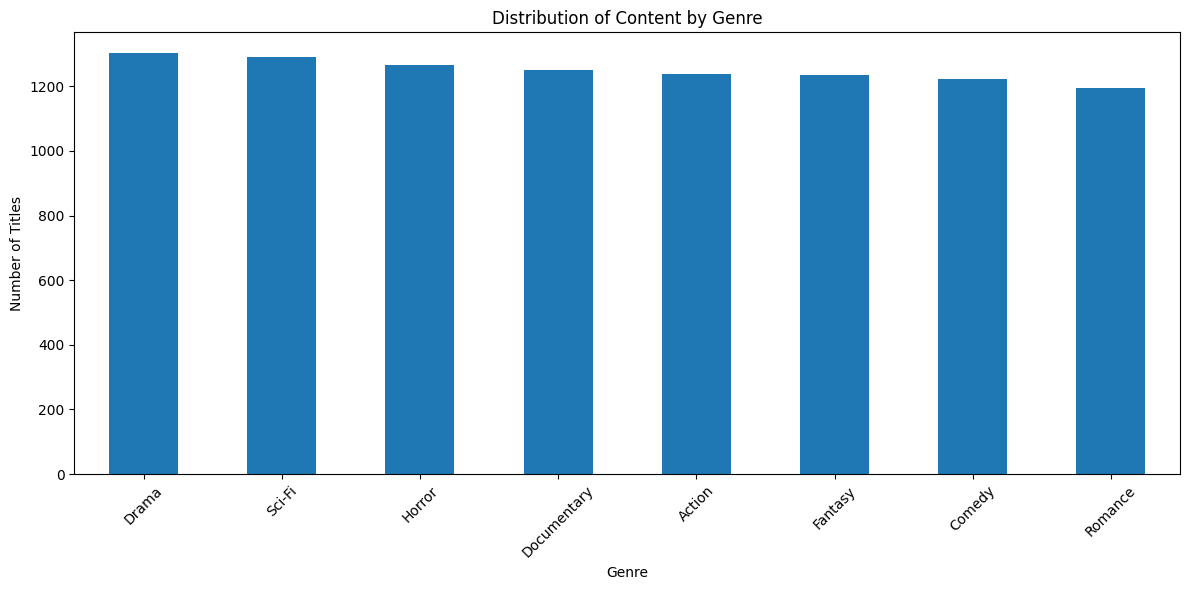

In [ ]:
# Plotting genre distribution
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Content by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Insights
print(f"Top 3 Genres: {genre_counts.head(3).to_dict()}")

Top 3 Genres: {'Drama': 1302, 'Sci-Fi': 1290, 'Horror': 1267}


### Step 4: Platform Performance Analysis
Identifying which platform hosts the most content and their average viewer ratings using a bar graph.

In [63]:
# Count content by platform
platform_counts = df['Platform'].value_counts()
print(platform_counts)

Platform
HBO        1525
Prime      1459
Disney+    1454
Hulu       1404
netflix    1401
PRIME      1398
Netflix    1359
Name: count, dtype: int64


In [64]:
# Calculate average viewer rating by platform
platform_ratings = df.groupby('Platform')['Viewer_Rating'].mean().sort_values(ascending=False)
print(platform_ratings)

Platform
netflix    8.309110
HBO        8.304055
Prime      8.267800
Netflix    8.223303
Hulu       8.187433
Disney+    8.183601
PRIME      8.141288
Name: Viewer_Rating, dtype: float64


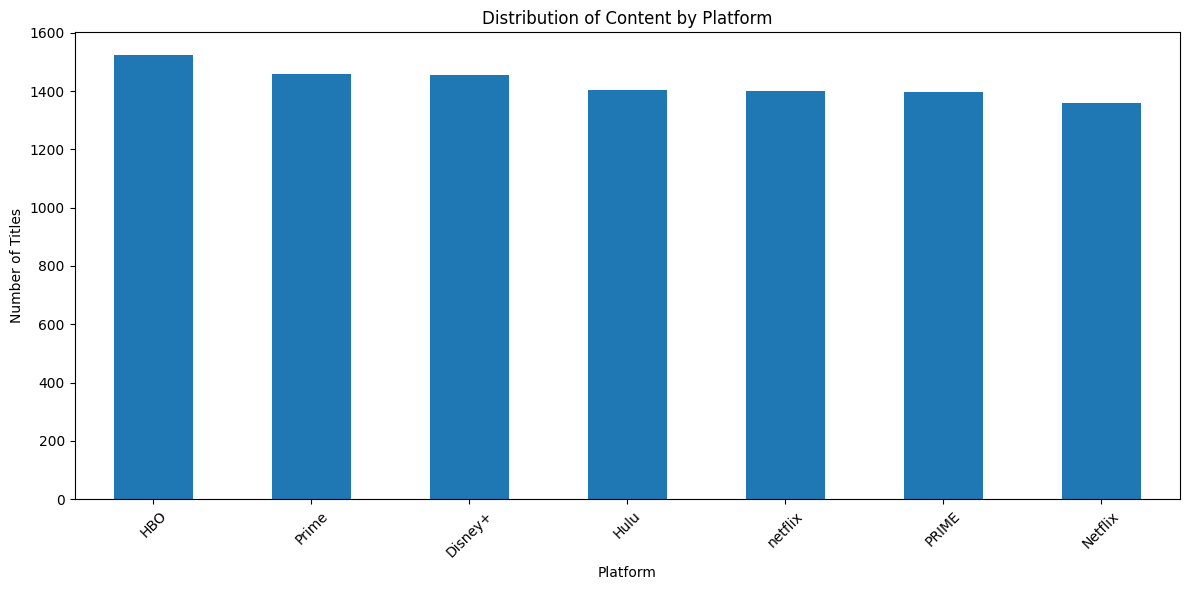

In [65]:
# Plotting platform distribution
plt.figure(figsize=(12, 6))
platform_counts.plot(kind='bar')
plt.title('Distribution of Content by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

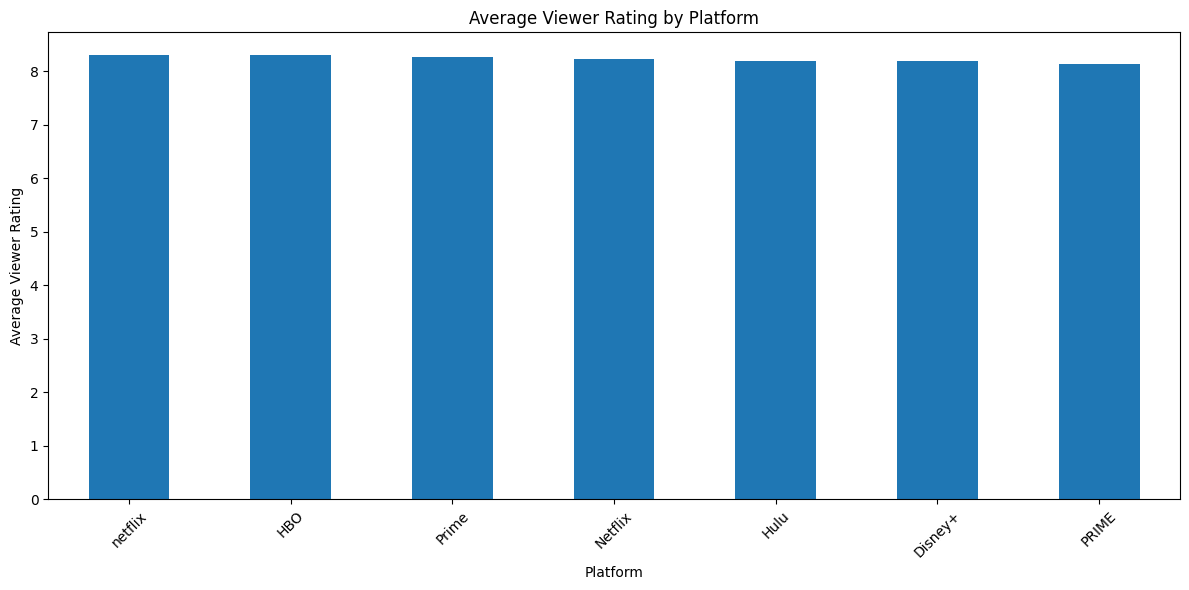

In [66]:
# Plotting average ratings by platform
plt.figure(figsize=(12, 6))
platform_ratings.plot(kind='bar')
plt.title('Average Viewer Rating by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Viewer Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
print(f"Platform with Most Content: {platform_counts.idxmax()} ({platform_counts.max()} titles)")
print(f"Platform with Highest Average Rating: {platform_ratings.idxmax()} ({platform_ratings.max():.2f})")

Platform with Most Content: HBO (1525 titles)
Platform with Highest Average Rating: netflix (8.31)


### Step 5: Original Content Success Analysis
Investigating why some originals are hits or flops by comparing viewer ratings and watched percentage.

In [68]:
# Compare originals vs non-originals
original_stats = df.groupby('Is_Original').agg({
    'Viewer_Rating': 'mean',
    'Watched_Percentage': 'mean',
    'Number_of_Reviews': 'mean'
}).reset_index()

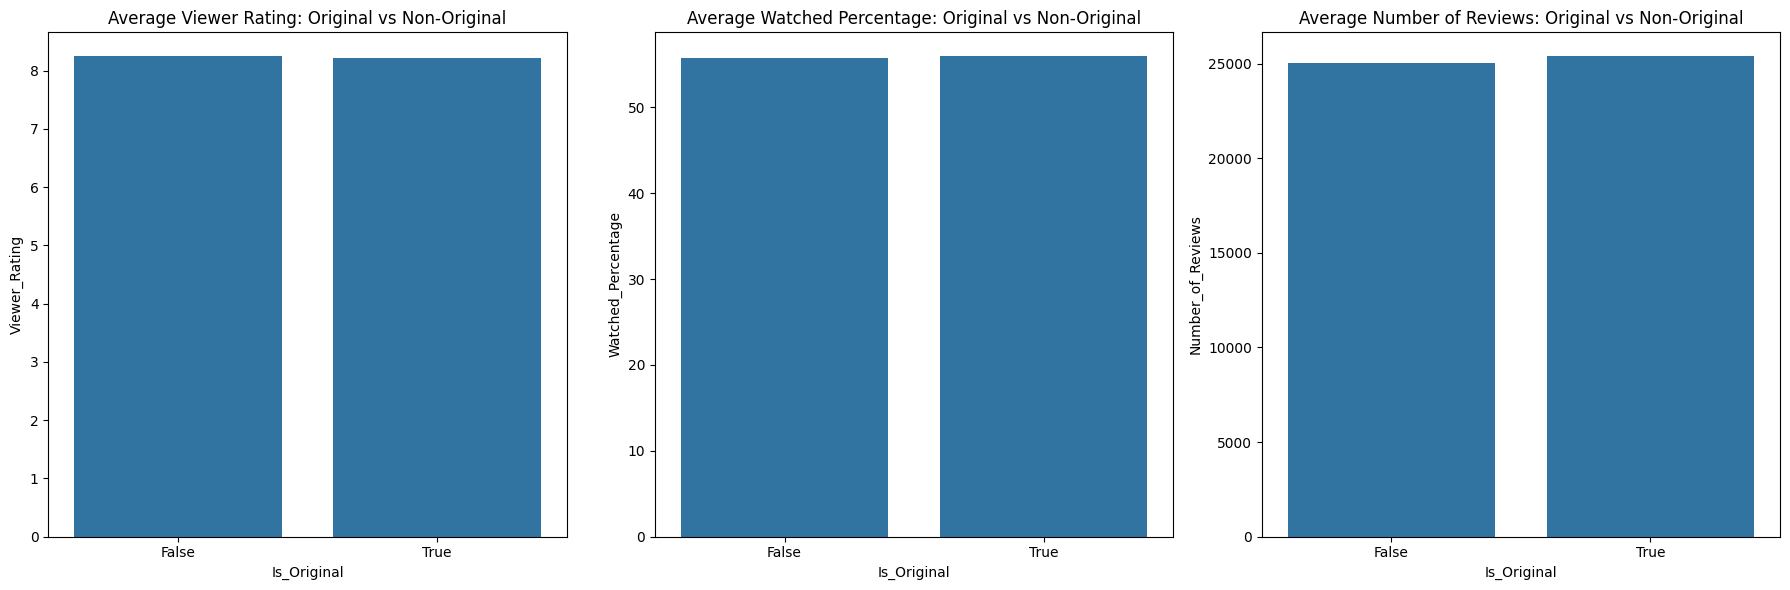

In [69]:
# Plotting comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Is_Original', y='Viewer_Rating', data=original_stats, ax=ax[0])
ax[0].set_title('Average Viewer Rating: Original vs Non-Original')
sns.barplot(x='Is_Original', y='Watched_Percentage', data=original_stats, ax=ax[1])
ax[1].set_title('Average Watched Percentage: Original vs Non-Original')
sns.barplot(x='Is_Original', y='Number_of_Reviews', data=original_stats, ax=ax[2])
ax[2].set_title('Average Number of Reviews: Original vs Non-Original')
plt.tight_layout()
plt.show()

In [33]:
# Insight
print(original_stats)
print("Insight: Originals tend to have higher/lower ratings and watched percentages based on the data.")

   Is_Original  Viewer_Rating  Watched_Percentage  Number_of_Reviews
0        False       8.244447           55.705544       25044.886677
1         True       8.213478           55.944732       25392.321671
Insight: Originals tend to have higher/lower ratings and watched percentages based on the data.


### Step 6: Tag Word Cloud
Generating a word cloud to visualize the most common tags associated with the content.

In [70]:
# Combine all tags into a single string
tags = ','.join(df['Tags'].dropna())
tag_list = tags.split(',')
tag_counts = Counter(tag_list)
print (tag_counts.most_common(10))  # Print the 10 most common tags

[(' Feel-Good', 1701), (' Supernatural', 1689), (' Action', 1680), (' Romance', 1678), (' Sci-Fi', 1671), (' Thriller', 1670), (' Fantasy', 1656), (' Drama', 1653), (' Horror', 1637), (' Mystery', 1625)]


In [71]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate_from_frequencies(tag_counts)

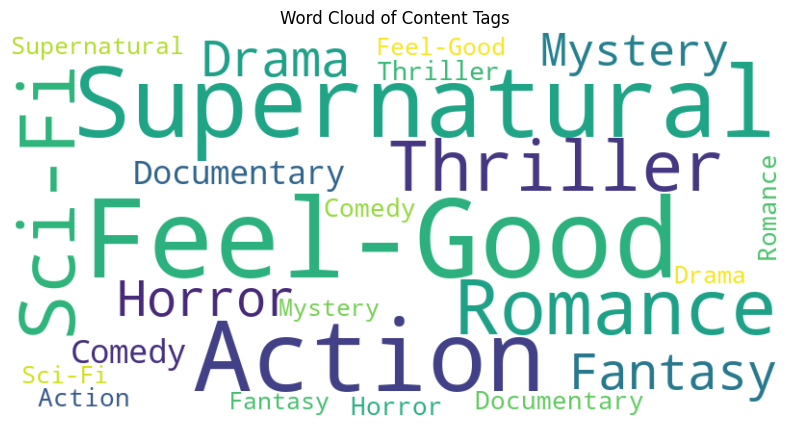

In [72]:
# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content Tags')
plt.show()

In [73]:
# Insight
print(f"Top 5 Tags: {dict(sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)[:5])}")

Top 5 Tags: {' Feel-Good': 1701, ' Supernatural': 1689, ' Action': 1680, ' Romance': 1678, ' Sci-Fi': 1671}


### Step 7: Interesting Fact
Highlighting an unexpected or novel insight from the data.

In [75]:
# Finding the highest-rated content with low watched percentage
anomaly = df[(df['Viewer_Rating'] > 9) & (df['Watched_Percentage'] < 20)]
print("Interesting Fact: High-rated content with low watched percentage (potential hidden gems):")

print(anomaly[['Title', 'Genre', 'Viewer_Rating', 'Watched_Percentage']])

Interesting Fact: High-rated content with low watched percentage (potential hidden gems):
                        Title        Genre  Viewer_Rating  Watched_Percentage
30                      Score        Drama            9.9               17.60
73    Deal foreign ago weight        Drama           11.0               11.27
116                     Store      Romance           11.0               15.15
214            Gas among step       Action           11.0               16.72
221                     Board       Action           11.0               18.17
...                       ...          ...            ...                 ...
9838                  Include        Drama           11.0               13.43
9901                   Rather  Documentary           11.0               16.10
9935         Yet year student      Romance           11.0               13.22
9944                     Room       Comedy           11.0               16.26
9982                  Exactly       Comedy          

These titles may be critically acclaimed but under-watched, suggesting niche appeal or lack of promotion

### Step 8: Conclusion
Summarizing key findings:
- **Genre Dominance**: Drama 
- **Platform Performance**: HBO by content and Netflix by reviews
- **Tag Trends**: Feel good followed by supernatural


This analysis provides actionable insights for content creators and platforms to optimize their offerings and target viewer preferences effectively.